@author: willystout

VEST 2020 Wisconsin precinct and election results: https://redistrictingdatahub.org/dataset/vest-2020-wisconsin-precinct-and-election-results/ 

Wisconsin block PL 94-171 2020 (by table): https://redistrictingdatahub.org/dataset/wisconsin-block-pl-94171-2020-by-table/

Wisconsin county PL 94-171 2020: https://redistrictingdatahub.org/dataset/wisconsin-county-pl-94171-2020/

2022 Wisconsin Congressional Districts Approved Plan: https://redistrictingdatahub.org/dataset/2022-wisconsin-congressional-districts-approved-plan/

VEST 2018 Wisconsin precinct and election results: https://redistrictingdatahub.org/dataset/vest-2018-wisconsin-precinct-and-election-results/ 

In [1]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os

maup.progress.enabled = True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
maup.progress.enabled = True

In [4]:
start_time = time.time()
population_df = gpd.read_file("./WI/wi_pl2020_b/wi_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import wi_pl2020_p1_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import wi_pl2020_p1_b.shp is: 0.48137656847635907 mins


In [5]:
start_time = time.time()
county_df = gpd.read_file("./WI/wi_pl2020_cnty/wi_pl2020_cnty.shp")
end_time = time.time()
print("The time to import wi_pl2020_cnty.shp is:",
      (end_time-start_time)/60, "mins")

The time to import wi_pl2020_cnty.shp is: 0.0013812700907389322 mins


In [6]:
start_time = time.time()
vest20_df = gpd.read_file("./WI/wi_vest_20/wi_vest_20.shp")
end_time = time.time()
print("The time to import wi_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import wi_vest_20.shp is: 0.026293893655141194 mins


In [7]:
start_time = time.time()
cong_df = gpd.read_file("./WI/wi_cong_adopted_2022/POLYGON.shp")
end_time = time.time()
print("The time to import wi_cong_adopted_2022/POLYGON.shp is:",
      (end_time-start_time)/60, "mins")

The time to import wi_cong_adopted_2022/POLYGON.shp is: 0.00027946631113688153 mins


In [8]:
start_time = time.time()
vest18_df = gpd.read_file("./WI/wi_vest_18/wi_vest_18.shp")
end_time = time.time()
print("The time to import wi_vest_18.shp is:",
      (end_time-start_time)/60, "mins")

The time to import wi_vest_18.shp is: 0.024790263175964354 mins


In [9]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())
cong_df = cong_df.to_crs(cong_df.estimate_utm_crs())
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())

In [10]:
population_df.head()

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0020001,P0020002,P0020003,P0020004,P0020005,...,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,geometry
0,550999704001040,750,0282395,7500000US550999704001040,099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((218468.619 5067521.851, 218473.825 5..."
1,550999706002032,750,0282833,7500000US550999706002032,099,24,0,24,22,21,...,0,0,0,0,0,0,0,0,0,"POLYGON ((225297.184 5059406.511, 225302.985 5..."
2,550999701003089,750,0282192,7500000US550999701003089,099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((253782.771 5075146.308, 253812.749 5..."
3,550999701003105,750,0282208,7500000US550999701003105,099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((250355.075 5072172.015, 250374.005 5..."
4,550999707001024,750,0283023,7500000US550999707001024,099,8,0,8,5,5,...,0,0,0,0,0,0,0,0,0,"POLYGON ((243111.821 5048902.330, 243113.107 5..."


In [11]:
county_df.head()

,STATEFP20,COUNTYFP20,COUNTYNS20,GEOID20,NAME20,NAMELSAD20,LSAD20,CLASSFP20,MTFCC20,CSAFP20,...,P0050002,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,geometry
0,55,095,01581108,55095,Polk,Polk County,06,H1,G4020,None,...,388,58,33,297,0,176,0,0,176,"POLYGON ((55820.311 5050858.609, 55818.423 505..."
1,55,045,01581082,55045,Green,Green County,06,H1,G4020,357,...,300,17,0,283,0,111,0,0,111,"POLYGON ((267549.933 4729536.475, 267565.970 4..."
2,55,087,01581104,55087,Outagamie,Outagamie County,06,H1,G4020,118,...,1654,434,10,1200,10,2139,1279,0,860,"POLYGON ((404913.041 4908423.745, 404912.989 4..."
3,55,001,01581060,55001,Adams,Adams County,06,H1,G4020,None,...,1110,1062,0,48,0,97,0,0,97,"POLYGON ((257977.858 4883897.075, 257720.919 4..."
4,55,119,01581119,55119,Taylor,Taylor County,06,H1,G4020,None,...,148,38,0,110,0,27,0,0,27,"POLYGON ((192210.416 5022894.332, 192210.692 5..."


In [12]:
vest20_df.head()

,CNTY_FIPS,CNTY_NAME,MCD_FIPS,MCD_NAME,CTV,WARDID,LABEL,PERSONS,RV,G20PREDBID,...,G20PREICAR,G20PREOWEL,G20PREOSIM,G20PREOBOD,G20PREOHAW,G20PREOLAR,G20PREOWES,G20PREOCHA,G20PREOWRI,geometry
0,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0060,EAU CLAIRE - C 0060,12,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((139292.953 4974890.501, 139269.277 4..."
1,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0059,EAU CLAIRE - C 0059,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((144305.023 4968892.880, 144316.453 4..."
2,55043,GRANT,5504363250,PLATTEVILLE,C,0002,PLATTEVILLE - C 0002,1371,942,489,...,1,0,0,0,0,0,0,0,3,"POLYGON ((215528.402 4738670.405, 215527.606 4..."
3,55043,GRANT,5504363250,PLATTEVILLE,C,0001,PLATTEVILLE - C 0001,1197,832,432,...,1,0,0,0,0,0,0,0,2,"POLYGON ((216386.194 4739423.917, 216459.462 4..."
4,55045,GREEN,5504500775,ALBANY,T,0001,ALBANY - T 0001,464,371,157,...,0,0,0,0,0,0,0,0,3,"POLYGON ((300826.104 4732164.174, 300821.170 4..."


In [13]:
cong_df.head()

,id,NAME,TotalPop,PopDevPc,DemPct,RepPct,WhitePct,Minority,BlackPct,Hispanic,PacificP,AsianPct,NativePc,TotalVAP,Margin,color,opacity,geometry
0,1.0,1,736715.0,0.000000,0.481142,0.491911,0.782418,0.217582,0.070932,0.102396,0.001110,0.024325,0.019329,575451.0,-0.018858,#0000FF,0.5,"POLYGON ((348358.235 4745226.043, 347592.443 4..."
1,2.0,2,736715.0,0.000000,0.694890,0.281285,0.820014,0.179986,0.046568,0.056653,0.001187,0.057611,0.015589,584519.0,0.194890,#008000,0.5,"POLYGON ((286255.899 4708986.006, 286384.418 4..."
2,3.0,3,736716.0,0.000001,0.486566,0.483154,0.909480,0.090520,0.016465,0.026567,0.001084,0.024026,0.017500,580338.0,-0.013434,#8B008B,0.5,"POLYGON ((166031.420 4975754.206, 166071.488 4..."
3,4.0,4,736714.0,-0.000001,0.734541,0.241345,0.470504,0.529496,0.314626,0.153485,0.001446,0.051948,0.021316,558133.0,0.234541,#FF0000,0.5,"POLYGON ((427547.312 4764043.628, 427625.398 4..."
4,5.0,5,736715.0,0.000000,0.346921,0.630317,0.883632,0.116368,0.019442,0.047246,0.000904,0.030984,0.013157,578845.0,-0.153079,#FFD700,0.5,"POLYGON ((383425.419 4738101.544, 383420.384 4..."


In [14]:
vest18_df.head()

,CNTY_FIPS,CNTY_NAME,MCD_FIPS,MCD_NAME,CTV,WARDID,LABEL,PERSONS,RV,G18USSRVUK,...,G18ATGOWRI,G18SOSRSCH,G18SOSDLAF,G18SOSOKAR,G18SOSOWRI,G18TRERHAR,G18TREDGOD,G18TRECZUE,G18TREOWRI,geometry
0,55139,WINNEBAGO,5513908000,BLACK WOLF,T,0001,BLACK WOLF - T 0001,792,590,279,...,0,289,190,0,0,283,182,9,0,"MULTIPOLYGON (((380332.966 4867079.825, 380321..."
1,55139,WINNEBAGO,5513908000,BLACK WOLF,T,0002,BLACK WOLF - T 0002,849,650,307,...,1,318,209,0,1,312,200,9,1,"MULTIPOLYGON (((376302.702 4870937.546, 376359..."
2,55039,FOND DU LAC,5503927975,FRIENDSHIP,T,0001,FRIENDSHIP - T 0001,908,550,242,...,0,252,155,0,1,250,145,8,0,"MULTIPOLYGON (((381711.110 4851479.799, 381727..."
3,55139,WINNEBAGO,5513908000,BLACK WOLF,T,0003,BLACK WOLF - T 0003,773,555,263,...,0,271,179,0,0,266,171,8,0,"MULTIPOLYGON (((383535.765 4861940.707, 383537..."
4,55007,BAYFIELD,5500739025,KELLY,T,0001,KELLY - T 0001,463,274,103,...,0,107,103,0,0,104,97,4,0,"POLYGON ((198408.669 5147671.053, 198407.229 5..."


In [15]:
print(population_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [16]:
print(county_df.columns)

Index(['STATEFP20', 'COUNTYFP20', 'COUNTYNS20', 'GEOID20', 'NAME20',
       'NAMELSAD20', 'LSAD20', 'CLASSFP20', 'MTFCC20', 'CSAFP20',
       ...
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'geometry'],
      dtype='object', length=349)


In [17]:
print(vest20_df.columns)

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G20PREDBID', 'G20PRERTRU', 'G20PRECBLA',
       'G20PRELJOR', 'G20PREICAR', 'G20PREOWEL', 'G20PREOSIM', 'G20PREOBOD',
       'G20PREOHAW', 'G20PREOLAR', 'G20PREOWES', 'G20PREOCHA', 'G20PREOWRI',
       'geometry'],
      dtype='object')


In [18]:
print(cong_df.columns)

Index(['id', 'NAME', 'TotalPop', 'PopDevPc', 'DemPct', 'RepPct', 'WhitePct',
       'Minority', 'BlackPct', 'Hispanic', 'PacificP', 'AsianPct', 'NativePc',
       'TotalVAP', 'Margin', 'color', 'opacity', 'geometry'],
      dtype='object')


In [19]:
print(vest18_df.columns)

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G18USSRVUK', 'G18USSDBAL', 'G18USSOWAL',
       'G18USSOSCH', 'G18USSOWRI', 'G18GOVRWAL', 'G18GOVDEVE', 'G18GOVLAND',
       'G18GOVGWHI', 'G18GOVITUR', 'G18GOVIENZ', 'G18GOVOCAS', 'G18GOVOBOU',
       'G18GOVOGRI', 'G18GOVOLAN', 'G18GOVOHOF', 'G18GOVOTUR', 'G18GOVONO1',
       'G18GOVONO2', 'G18GOVOWRI', 'G18ATGRSCH', 'G18ATGDKAU', 'G18ATGCLAR',
       'G18ATGOWRI', 'G18SOSRSCH', 'G18SOSDLAF', 'G18SOSOKAR', 'G18SOSOWRI',
       'G18TRERHAR', 'G18TREDGOD', 'G18TRECZUE', 'G18TREOWRI', 'geometry'],
      dtype='object')


In [20]:
vest20_df.drop(columns=['G20PRECBLA', 'G20PRELJOR', 'G20PREICAR', 'G20PREOWEL', 'G20PREOSIM',
              'G20PREOBOD', 'G20PREOHAW', 'G20PREOLAR', 'G20PREOWES', 'G20PREOCHA', 'G20PREOWRI',], inplace=True)

In [21]:
vest20_df.columns

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G20PREDBID', 'G20PRERTRU', 'geometry'],
      dtype='object')

In [22]:
vest18_df.drop(columns=['G18USSOWAL', 'G18USSOSCH', 'G18USSOWRI', 'G18GOVLAND', 'G18GOVGWHI', 'G18GOVITUR', 'G18GOVIENZ', 'G18GOVOCAS', 'G18GOVOBOU', 'G18GOVOGRI',
              'G18GOVOLAN', 'G18GOVOHOF', 'G18GOVOTUR', 'G18GOVONO1', 'G18GOVONO2', 'G18GOVOWRI', 'G18ATGCLAR', 'G18ATGOWRI', 'G18SOSOKAR', 'G18SOSOWRI', 'G18TRECZUE', 'G18TREOWRI'], inplace=True)

In [23]:
vest18_df.columns

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G18USSRVUK', 'G18USSDBAL', 'G18GOVRWAL',
       'G18GOVDEVE', 'G18ATGRSCH', 'G18ATGDKAU', 'G18SOSRSCH', 'G18SOSDLAF',
       'G18TRERHAR', 'G18TREDGOD', 'geometry'],
      dtype='object')

In [24]:
population_df.isna().sum()

GEOID20     0
SUMLEV      0
LOGRECNO    0
GEOID       0
COUNTY      0
           ..
P0020070    0
P0020071    0
P0020072    0
P0020073    0
geometry    0
Length: 79, dtype: int64

In [25]:
county_df.isna().sum()

STATEFP20     0
COUNTYFP20    0
COUNTYNS20    0
GEOID20       0
NAME20        0
             ..
P0050007      0
P0050008      0
P0050009      0
P0050010      0
geometry      0
Length: 349, dtype: int64

In [26]:
vest20_df.isna().sum()

CNTY_FIPS     0
CNTY_NAME     0
MCD_FIPS      0
MCD_NAME      0
CTV           0
WARDID        0
LABEL         0
PERSONS       0
RV            0
G20PREDBID    0
G20PRERTRU    0
geometry      0
dtype: int64

In [27]:
cong_df.isna().sum()

id          0
NAME        0
TotalPop    0
PopDevPc    0
DemPct      0
RepPct      0
WhitePct    0
Minority    0
BlackPct    0
Hispanic    0
PacificP    0
AsianPct    0
NativePc    0
TotalVAP    0
Margin      0
color       0
opacity     0
geometry    0
dtype: int64

In [28]:
vest18_df.isna().sum()

CNTY_FIPS     0
CNTY_NAME     0
MCD_FIPS      0
MCD_NAME      0
CTV           0
WARDID        0
LABEL         0
PERSONS       0
RV            0
G18USSRVUK    0
G18USSDBAL    0
G18GOVRWAL    0
G18GOVDEVE    0
G18ATGRSCH    0
G18ATGDKAU    0
G18SOSRSCH    0
G18SOSDLAF    0
G18TRERHAR    0
G18TREDGOD    0
geometry      0
dtype: int64

In [29]:
maup.doctor(population_df)

100%|██████████| 203059/203059 [01:24<00:00, 2392.29it/s]


True

In [30]:
maup.doctor(county_df)

100%|██████████| 72/72 [00:00<00:00, 557.49it/s]


True

In [31]:
maup.doctor(vest20_df)

100%|██████████| 7093/7093 [00:05<00:00, 1408.42it/s]


There are 252 overlaps.
There are 1169 holes.


False

In [32]:
maup.doctor(cong_df)

100%|██████████| 8/8 [00:00<00:00, 398.81it/s]


True

In [33]:
maup.doctor(vest18_df)

100%|██████████| 6997/6997 [00:05<00:00, 1381.52it/s]


There are 2460 overlaps.
There are 2999 holes.
There are some invalid geometries.


False

In [34]:
# vest18_df = smart_repair(vest18_df, nest_within_regions=county_df)

In [35]:
final_df = smart_repair(vest20_df, nest_within_regions = county_df)

100%|██████████| 72/72 [00:00<00:00, 543.95it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|██████████| 72/72 [00:00<00:00, 146.43it/s]


Identifying overlaps...


100%|██████████| 15336/15336 [00:05<00:00, 2647.59it/s]


Resolving overlaps and filling gaps...


Gaps to fill in region 1: 100%|██████████| 66/66 [00:00<00:00, 73.66it/s] 
Gaps to simplify in region 2: 40it [00:07,  5.10it/s]                        
Gaps to fill in region 7: 100%|██████████| 17/17 [00:00<00:00, 38.20it/s]


2 gaps in region 8 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 9: 100%|██████████| 18/18 [00:00<00:00, 42.75it/s]


1 gaps in region 10 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 11: 100%|██████████| 67/67 [00:00<00:00, 73.63it/s] 
Gaps to simplify in region 12: 73it [00:01, 39.74it/s]                        
Gaps to fill in region 12: 100%|██████████| 34/34 [00:01<00:00, 26.92it/s]
Gaps to simplify in region 13: 155it [00:04, 34.50it/s]                         
Gaps to fill in region 13: 100%|██████████| 32/32 [00:01<00:00, 18.35it/s]


1 gaps in region 14 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 17: 100%|██████████| 25/25 [00:00<00:00, 49.56it/s]


1 gaps in region 18 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 19: 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]


1 gaps in region 20 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 22: 100%|██████████| 18/18 [00:00<00:00, 27.65it/s]


1 gaps in region 23 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 24: 100%|██████████| 7/7 [00:00<00:00, 43.48it/s]


1 gaps in region 25 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 26: 100%|██████████| 9/9 [00:01<00:00,  6.35it/s]


1 gaps in region 27 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 28: 100%|██████████| 12/12 [00:00<00:00, 95.65it/s]
Gaps to simplify in region 29: 119it [00:02, 46.22it/s]                         
Gaps to fill in region 31: 100%|██████████| 64/64 [00:00<00:00, 70.18it/s] 
Gaps to simplify in region 32: 78it [00:01, 46.73it/s]                        
Gaps to fill in region 37: 100%|██████████| 5/5 [00:00<00:00, 40.78it/s]


1 gaps in region 38 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 38: 100%|██████████| 15/15 [00:00<00:00, 26.03it/s]


1 gaps in region 39 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 39: 100%|██████████| 6/6 [00:00<00:00, 44.25it/s]
Gaps to simplify in region 40: 93it [00:17,  5.25it/s]                        
Gaps to fill in region 45: 100%|██████████| 14/14 [00:00<00:00, 35.23it/s]
Gaps to simplify in region 46: 36it [00:04,  7.66it/s]                        
Gaps to fill in region 46: 100%|██████████| 28/28 [00:01<00:00, 19.63it/s]
Gaps to simplify in region 47: 41it [00:10,  3.77it/s]                        
Gaps to fill in region 47: 100%|██████████| 74/74 [00:01<00:00, 66.33it/s]


1 gaps in region 48 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 48: 100%|██████████| 12/12 [00:00<00:00, 18.45it/s]


1 gaps in region 49 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 49: 100%|██████████| 29/29 [00:01<00:00, 17.77it/s]


1 gaps in region 50 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 56: 100%|██████████| 20/20 [00:00<00:00, 25.86it/s]


1 gaps in region 57 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 57: 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]


1 gaps in region 58 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 58: 100%|██████████| 13/13 [00:00<00:00, 31.29it/s]
Gaps to simplify in region 59: 64it [00:01, 34.79it/s]                        
Gaps to fill in region 59: 100%|██████████| 31/31 [00:01<00:00, 30.62it/s]


1 gaps in region 60 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 61: 100%|██████████| 7/7 [00:00<00:00, 36.66it/s]


1 gaps in region 62 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 62: 100%|██████████| 24/24 [00:00<00:00, 38.07it/s]


2 gaps in region 63 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to simplify in region 63: 100%|██████████| 11/11 [00:00<00:00, 125.98it/s]
Gaps to fill: 0it [00:00, ?it/s]
Gaps to fill in region 64: 100%|██████████| 11/11 [00:00<00:00, 59.06it/s]
Gaps to simplify in region 65: 66it [00:08,  7.45it/s]                         
Gaps to fill in region 66: 100%|██████████| 51/51 [00:00<00:00, 79.87it/s]
Gaps to simplify in region 67: 60it [00:00, 97.04it/s]                         
Gaps to fill in region 67: 100%|██████████| 14/14 [00:00<00:00, 37.37it/s]


1 gaps in region 68 will remain unfilled, because they either are not simply connected or exceed the area threshold.


Gaps to fill in region 70: 100%|██████████| 40/40 [00:00<00:00, 95.24it/s]
Gaps to simplify in region 71: 154it [00:02, 51.72it/s]                         
Gaps to fill in region 71: 100%|██████████| 25/25 [00:00<00:00, 54.43it/s]


In [36]:
import copy
boundaries = copy.deepcopy(final_df)
boundaries["geometry"] = boundaries.geometry.boundary  # get boundaries
neighbors = gpd.sjoin(boundaries, final_df, predicate="intersects") # find boundaries that intersect
neighbors = neighbors[neighbors.index != neighbors.index_right] # remove boundaries of a region with itself

# compute shared border length using intersection
borders = list(neighbors.apply(
    lambda row: row.geometry.intersection(boundaries.loc[row.index_right, "geometry"]).length, axis=1
))

borders.sort()
print(borders[:1000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [37]:
final_df = smart_repair(final_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|██████████| 8538/8538 [00:02<00:00, 3507.16it/s]


Resolving overlaps...
1 gaps will remain unfilled, because they either are not simply connected or exceed the area threshold.
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]

Converting small rook adjacencies to queen...



100%|██████████| 5/5 [00:00<00:00, 321.79it/s]


In [38]:
maup.doctor(final_df)

100%|██████████| 7093/7093 [00:05<00:00, 1405.46it/s]


There are 1 holes.


False

In [39]:
temp_df = final_df

In [40]:
temp2_df = final_df

In [41]:
temp2_df

,CNTY_FIPS,CNTY_NAME,MCD_FIPS,MCD_NAME,CTV,WARDID,LABEL,PERSONS,RV,G20PREDBID,G20PRERTRU,geometry
0,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0060,EAU CLAIRE - C 0060,12,0,0,0,"POLYGON ((139292.953 4974890.501, 139269.277 4..."
1,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0059,EAU CLAIRE - C 0059,0,0,0,0,"POLYGON ((144293.370 4968889.799, 144299.314 4..."
2,55043,GRANT,5504363250,PLATTEVILLE,C,0002,PLATTEVILLE - C 0002,1371,942,489,310,"POLYGON ((215528.402 4738670.405, 215527.606 4..."
3,55043,GRANT,5504363250,PLATTEVILLE,C,0001,PLATTEVILLE - C 0001,1197,832,432,274,"POLYGON ((215527.606 4738649.504, 215528.402 4..."
4,55045,GREEN,5504500775,ALBANY,T,0001,ALBANY - T 0001,464,371,157,171,"POLYGON ((298125.860 4737453.950, 298140.360 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7088,55133,WAUKESHA,5513383175,WALES,V,0004,WALES - V 0004,343,330,108,183,"POLYGON ((388801.829 4762486.418, 388801.800 4..."
7089,55133,WAUKESHA,5513328487,GENESEE,T,0011,GENESEE - T 0011,0,0,0,0,"POLYGON ((389075.469 4762020.186, 389082.335 4..."
7090,55039,FOND DU LAC,5503984425,WAUPUN,C,0009,WAUPUN - C 0009,1345,952,248,573,"POLYGON ((357702.322 4832634.164, 357702.248 4..."
7091,55039,FOND DU LAC,5503984425,WAUPUN,C,009B,WAUPUN - C 009B,0,0,0,0,"POLYGON ((357588.185 4834250.138, 357635.899 4..."


<Axes: >

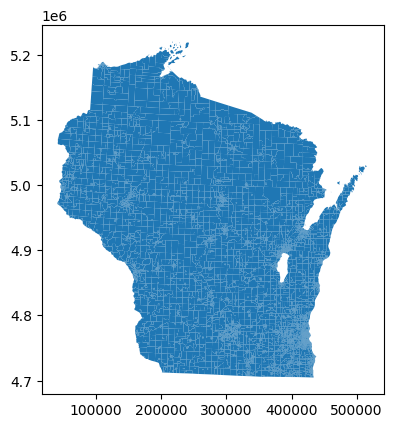

In [42]:
final_df.plot() ## Looks good, the hole in the data is the lake

In [43]:
final_df.columns

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G20PREDBID', 'G20PRERTRU', 'geometry'],
      dtype='object')

In [44]:
pop_assignment = maup.assign(population_df.geometry, final_df.geometry)
cong_assignment = maup.assign(final_df.geometry, cong_df.geometry)

100%|██████████| 8/8 [00:00<00:00, 22.93it/s]


In [45]:
final_df.columns

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G20PREDBID', 'G20PRERTRU', 'geometry'],
      dtype='object')

In [46]:
final_df_1 = final_df.copy()

In [47]:
final_df_1

,CNTY_FIPS,CNTY_NAME,MCD_FIPS,MCD_NAME,CTV,WARDID,LABEL,PERSONS,RV,G20PREDBID,G20PRERTRU,geometry
0,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0060,EAU CLAIRE - C 0060,12,0,0,0,"POLYGON ((139292.953 4974890.501, 139269.277 4..."
1,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0059,EAU CLAIRE - C 0059,0,0,0,0,"POLYGON ((144293.370 4968889.799, 144299.314 4..."
2,55043,GRANT,5504363250,PLATTEVILLE,C,0002,PLATTEVILLE - C 0002,1371,942,489,310,"POLYGON ((215528.402 4738670.405, 215527.606 4..."
3,55043,GRANT,5504363250,PLATTEVILLE,C,0001,PLATTEVILLE - C 0001,1197,832,432,274,"POLYGON ((215527.606 4738649.504, 215528.402 4..."
4,55045,GREEN,5504500775,ALBANY,T,0001,ALBANY - T 0001,464,371,157,171,"POLYGON ((298125.860 4737453.950, 298140.360 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7088,55133,WAUKESHA,5513383175,WALES,V,0004,WALES - V 0004,343,330,108,183,"POLYGON ((388801.829 4762486.418, 388801.800 4..."
7089,55133,WAUKESHA,5513328487,GENESEE,T,0011,GENESEE - T 0011,0,0,0,0,"POLYGON ((389075.469 4762020.186, 389082.335 4..."
7090,55039,FOND DU LAC,5503984425,WAUPUN,C,0009,WAUPUN - C 0009,1345,952,248,573,"POLYGON ((357702.322 4832634.164, 357702.248 4..."
7091,55039,FOND DU LAC,5503984425,WAUPUN,C,009B,WAUPUN - C 009B,0,0,0,0,"POLYGON ((357588.185 4834250.138, 357635.899 4..."


In [48]:
final_df_1.isna().sum()

CNTY_FIPS     0
CNTY_NAME     0
MCD_FIPS      0
MCD_NAME      0
CTV           0
WARDID        0
LABEL         0
PERSONS       0
RV            0
G20PREDBID    0
G20PRERTRU    0
geometry      0
dtype: int64

In [49]:
pop_assignment

0         5214.0
1         5864.0
2         5833.0
3         5856.0
4         5853.0
           ...  
203054    3115.0
203055    2947.0
203056    3000.0
203057    2929.0
203058    2963.0
Length: 203059, dtype: float64

In [50]:
pop_assignment.isna().sum()

218

In [51]:
cong_assignment

0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
7088    4.0
7089    4.0
7090    5.0
7091    5.0
7092    5.0
Length: 7093, dtype: float64

In [52]:
cong_assignment.isna().sum()

1

In [53]:
final_df_1 = final_df_1.dropna()

In [54]:
cong_assignment = cong_assignment.dropna()

In [55]:
pop_assignment = pop_assignment.dropna()

In [56]:
pop_assignment.isna().sum()

0

In [57]:
cong_assignment.isna().sum()

0

In [58]:
final_df_1.isna().sum()

CNTY_FIPS     0
CNTY_NAME     0
MCD_FIPS      0
MCD_NAME      0
CTV           0
WARDID        0
LABEL         0
PERSONS       0
RV            0
G20PREDBID    0
G20PRERTRU    0
geometry      0
dtype: int64

In [59]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']
for name in pop_column_names:
    final_df_1[name] = population_df[name].groupby(pop_assignment).sum()

In [60]:
print(county_df['P0020001'].sum()) # Makes sure we didn't lose any pop blocks
print(final_df_1['P0020001'].sum())

5893718
5893718.0


In [61]:
final_df_1.columns

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G20PREDBID', 'G20PRERTRU', 'geometry',
       'P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008',
       'P0020009', 'P0020010', 'P0020011'],
      dtype='object')

In [62]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDHAR': 'G20USSD', 
                                        'G20USSRGRA': 'G20USSR'}

In [63]:
final_df_2 = final_df_1.copy()

In [64]:
final_df_2.rename(columns=rename_dict, inplace = True) 

In [65]:
final_df_2.columns

Index(['CNTY_FIPS', 'CNTY_NAME', 'MCD_FIPS', 'MCD_NAME', 'CTV', 'WARDID',
       'LABEL', 'PERSONS', 'RV', 'G20PRED', 'G20PRER', 'geometry', 'TOTPOP',
       'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI',
       'NH_OTHER', 'NH_2MORE'],
      dtype='object')

In [66]:
final_df_2["CD"] = cong_assignment

In [67]:
print(set(final_df_2["CD"]))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan}


In [69]:
final_df_2["CD"].isna().sum()

1

In [70]:
final_df_2 = final_df_2.dropna()

In [71]:
final_df_2["CD"].isna().sum()

0

In [72]:
final_df_2

,CNTY_FIPS,CNTY_NAME,MCD_FIPS,MCD_NAME,CTV,WARDID,LABEL,PERSONS,RV,G20PRED,...,TOTPOP,HISP,NH_WHITE,NH_BLACK,NH_AMIN,NH_ASIAN,NH_NHPI,NH_OTHER,NH_2MORE,CD
0,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0060,EAU CLAIRE - C 0060,12,0,0,...,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.0
1,55035,EAU CLAIRE,5503522300,EAU CLAIRE,C,0059,EAU CLAIRE - C 0059,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,55043,GRANT,5504363250,PLATTEVILLE,C,0002,PLATTEVILLE - C 0002,1371,942,489,...,1412.0,28.0,1268.0,33.0,3.0,26.0,0.0,1.0,53.0,2.0
3,55043,GRANT,5504363250,PLATTEVILLE,C,0001,PLATTEVILLE - C 0001,1197,832,432,...,1321.0,38.0,1168.0,36.0,2.0,26.0,0.0,2.0,49.0,2.0
4,55045,GREEN,5504500775,ALBANY,T,0001,ALBANY - T 0001,464,371,157,...,499.0,11.0,466.0,2.0,4.0,0.0,0.0,1.0,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,55063,LA CROSSE,5506335450,HOLMEN,V,0011,HOLMEN - V 0011,982,756,346,...,1188.0,16.0,998.0,13.0,0.0,113.0,0.0,0.0,48.0,2.0
7088,55133,WAUKESHA,5513383175,WALES,V,0004,WALES - V 0004,343,330,108,...,394.0,10.0,353.0,3.0,2.0,10.0,0.0,0.0,16.0,4.0
7090,55039,FOND DU LAC,5503984425,WAUPUN,C,0009,WAUPUN - C 0009,1345,952,248,...,1455.0,59.0,1325.0,11.0,5.0,12.0,1.0,3.0,39.0,5.0
7091,55039,FOND DU LAC,5503984425,WAUPUN,C,009B,WAUPUN - C 009B,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [73]:
cong_df

,id,NAME,TotalPop,PopDevPc,DemPct,RepPct,WhitePct,Minority,BlackPct,Hispanic,PacificP,AsianPct,NativePc,TotalVAP,Margin,color,opacity,geometry
0,1.0,1,736715.0,0.000000,0.481142,0.491911,0.782418,0.217582,0.070932,0.102396,0.001110,0.024325,0.019329,575451.0,-0.018858,#0000FF,0.5,"POLYGON ((348358.235 4745226.043, 347592.443 4..."
1,2.0,2,736715.0,0.000000,0.694890,0.281285,0.820014,0.179986,0.046568,0.056653,0.001187,0.057611,0.015589,584519.0,0.194890,#008000,0.5,"POLYGON ((286255.899 4708986.006, 286384.418 4..."
2,3.0,3,736716.0,0.000001,0.486566,0.483154,0.909480,0.090520,0.016465,0.026567,0.001084,0.024026,0.017500,580338.0,-0.013434,#8B008B,0.5,"POLYGON ((166031.420 4975754.206, 166071.488 4..."
3,4.0,4,736714.0,-0.000001,0.734541,0.241345,0.470504,0.529496,0.314626,0.153485,0.001446,0.051948,0.021316,558133.0,0.234541,#FF0000,0.5,"POLYGON ((427547.312 4764043.628, 427625.398 4..."
4,5.0,5,736715.0,0.000000,0.346921,0.630317,0.883632,0.116368,0.019442,0.047246,0.000904,0.030984,0.013157,578845.0,-0.153079,#FFD700,0.5,"POLYGON ((383425.419 4738101.544, 383420.384 4..."
5,6.0,6,736714.0,-0.000001,0.408809,0.563021,0.885271,0.114729,0.025438,0.042427,0.000945,0.025826,0.016183,582819.0,-0.091191,#008080,0.5,"POLYGON ((385972.149 4822148.553, 386004.056 4..."
6,7.0,7,736715.0,0.000000,0.406008,0.566827,0.914368,0.085632,0.009971,0.019420,0.001041,0.016634,0.032366,580264.0,-0.093992,#D2691E,0.5,"POLYGON ((283876.869 5128554.316, 283833.607 5..."
7,8.0,8,736714.0,-0.000001,0.413727,0.558930,0.867666,0.132334,0.019672,0.048263,0.000960,0.023414,0.037826,571931.0,-0.086273,#6A5ACD,0.5,"POLYGON ((338539.509 4900835.427, 339622.358 4..."


In [74]:
final_df_2["CD"].isna().sum()

0

In [75]:
final_df_2.isna().sum()

CNTY_FIPS    0
CNTY_NAME    0
MCD_FIPS     0
MCD_NAME     0
CTV          0
WARDID       0
LABEL        0
PERSONS      0
RV           0
G20PRED      0
G20PRER      0
geometry     0
TOTPOP       0
HISP         0
NH_WHITE     0
NH_BLACK     0
NH_AMIN      0
NH_ASIAN     0
NH_NHPI      0
NH_OTHER     0
NH_2MORE     0
CD           0
dtype: int64

In [76]:
final_df_2["CD"]

0       2.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
7087    2.0
7088    4.0
7090    5.0
7091    5.0
7092    5.0
Name: CD, Length: 7062, dtype: float64

In [77]:
## Uses real district names
for precinct_index in range(len(final_df_2)):
    final_df_2.at[precinct_index, "CD"] = cong_df.at[int(final_df_2.at[precinct_index, "CD"]), "NAME"]
print(set(cong_df["NAME"]))
print(set(final_df_2["CD"]))

KeyError: 298

<Axes: >

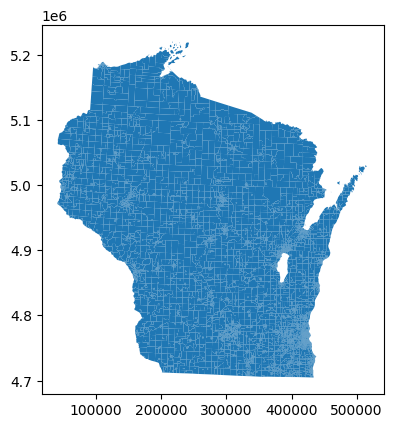

In [119]:
final_df_2.plot() ## See an image of the geodataframe

In [120]:
pop_vals = [final_df_2.loc[final_df_2["CD"] == str(n), "TOTPOP"].sum() for n in range(1, 9)]
print(pop_vals) ## Population nearly the same in each district

[736286.0, 736822.0, 736959.0, 736395.0, 737306.0, 736545.0, 736572.0, 736833.0]


In [121]:
directory = "./WI_DATA"
if not os.path.exists(directory):
    os.makedirs(directory)
final_df_2.to_file("./WI_DATA/WI.shp")

# CITATION: CODE FOUND IN LAB 3

In [122]:
import matplotlib.pyplot as plt
import networkx as nx
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, Election
from gerrychain.updaters import cut_edges, Tally
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import time
from gerrychain.tree import bipartition_tree


ct_file = gpd.read_file("./WI_DATA/WI.shp") # reads a file from ct directory
ct_graph = Graph.from_geodataframe(ct_file) # creates a graph from a geodataframe
print(ct_graph.nodes()[0]) # Prints out the attributes of each node in the graph
tot_pop = sum([ct_graph.nodes()[v]['TOTPOP'] for v in ct_graph.nodes() if not pd.isna(ct_graph.nodes()[v]['TOTPOP'])]) # gets the total population for ideal population calculation if the values are numbers
print(tot_pop)


ct_partition = Partition( # creates a partition for the IL graph
    ct_graph, # dual graph
    assignment = "CD", # initial districting plan
    updaters={
    "our cut edges": cut_edges, # number of cut edges in a graph
    "district population": Tally("TOTPOP", alias = "district population"), # across districts, total population 
    "hispanic population": Tally("HISP", alias = "hispanic population"), # across districts, hispanic population 
    "democratic votes": Tally("G20PRED", alias = "democratic votes"), # across districts, number of democratic votes
    "republican votes": Tally("G20PRER", alias = "republican votes"), # across districts, number of republican votes
})
print(ct_partition["district population"]) # Prints the population for each district
print(ct_partition["democratic votes"]) # prints the number of democratic votes for each district
print(ct_partition["republican votes"]) # prints the number of republican votes for each district
ideal_pop = tot_pop/5 # calculates the ideal population 
pop_tolerance = 0.05 # population tolerance for the proposal
print(ideal_pop)

# found this code in gerrychain_intro_complete-2.ipynb
start_time = time.time()
rw_proposal = partial(recom, ## how you choose a next districting plan
                      pop_col = "TOTPOP", ## What data describes population? 
                      pop_target = ideal_pop, ## What the target/ideal population is for each district 
                                              ## (we calculated ideal pop above)
                      epsilon = pop_tolerance,  ## how far from ideal population you can deviate
                                              ## (we set pop_tolerance above)
                      node_repeats = 100, ## number of times to repeat bipartition.  Can increase if you get a BipartitionWarning
                    #   allow_pair_reselection=True,
                        method = partial(
                        bipartition_tree,
                        max_attempts=100,
                        allow_pair_reselection=True  # <-- This is the only change
    )
                      )
population_constraint = constraints.within_percent_of_ideal_population(
    ct_partition, 
    pop_tolerance, 
    pop_key="district population")

random_walk_10 = MarkovChain( # random walk for 10000 steps
    proposal = rw_proposal, 
    constraints = [population_constraint], # Could add additional constraints here
    accept = always_accept, # Accept every proposed plan that meets the population constraints
    initial_state = ct_partition, 
    total_steps = 10)

cutedge_ensemble_10 = [] ## Cut edge ensemble for Markov Chain with 10000 steps
hisp_maj_ensemble_10 = [] ## Hisp majority ensemble for Markov Chain with 10000 steps
dem_maj_ensemble_10 = [] ## Dem majority ensemble for Markov Chain with 10000 steps

for j, part in enumerate(random_walk_10):
    print(j)
    # Add cutedges to cutedges ensemble
    cutedge_ensemble_10.append(len(part["our cut edges"]))
    # Calculate number of hisp-majority and dem-majority districts 
    # Add to ensemble
    num_maj_hisp = 0
    num_maj_dem = 0
    
    for i in range(0,8):
        district = str(i)
        b_perc = part["hispanic population"][district] / part["district population"][district] # calculation for hispanic population 
        dem_perc = part["democratic votes"][district] / (part["democratic votes"][district] + part["republican votes"][district]) # calculation for democratic vote share
        if dem_perc >= 0.5: # if majority democratic
            num_maj_dem = num_maj_dem + 1
        if b_perc >= 0.5: # if majority hispanic
            num_maj_hisp = num_maj_hisp + 1
    hisp_maj_ensemble_10.append(num_maj_hisp)
    dem_maj_ensemble_10.append(num_maj_dem)
end_time = time.time()

print("The time of execution of above program is :",
      (end_time-start_time)/60, "mins")

GeometryError: Invalid geometries at rows [6678] before reprojection. Consider repairing the affected geometries with `.buffer(0)`, or pass `ignore_errors=True` to attempt to create the graph anyways.

In [ ]:
print(cutedge_ensemble_10)
print(dem_maj_ensemble_10)
print(hisp_maj_ensemble_10)